# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Environment of the agent in terms of PEAS (Performance , Environment, Actuators, Sensors) for the given problem statement:
1. Performance Measure (P)
Objective: The primary goal is to minimize the total delivery time while ensuring all packages are delivered to their respective locations.
Secondary Objectives:
Avoid no-fly zones (red areas) to ensure safety and compliance.
Navigate around obstacles (black areas) to avoid collisions.
2. Environment (E)	
Type: The environment is an urban environment, where the drone needs to navigate through a complex network of roads (green areas) while delivering packages to specific points (blue points).
Challenges:
Obstacles: Represented by black circles, these could be tall buildings or restricted areas that the drone must avoid.
No-fly Zones: Represented by red circles, these are areas where the drone is prohibited from flying due to legal or safety reasons.
Delivery Points: Represented by blue circles, these are the locations where packages need to be delivered.
3. Actuators (A)
Motors for Movement: The drone has motors that allow it to move in the air in all directions—forward, backward, upward, downward, and to rotate.
Delivery Mechanism: A system to release packages at the designated delivery points.
Obstacle Avoidance System: Ensures that the drone can steer clear of obstacles in its path.
4. Sensors (S)
GPS: To determine the drone's current location and help navigate towards delivery points.
Cameras : To detect obstacles, no-fly zones, and buildings , providing data for collision avoidance.
Communication System: To receive real-time updates about no-fly zones, delivery points, and other dynamic environmental factors.


Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTANT: Write distinct code block as below

In [2]:
#Code Block : Set Initial State (Must handle dynamic inputs)
class Graph:
    def __init__(self):
        self.nodes = {}  # To store all the nodes

    def add_node(self, node, color):
        # To add a node with its color and initialize its empty neighbors
        self.nodes[node] = {'color': color, 'neighbors': {}}

    def add_edge(self, node1, node2, cost=1):
        # To add bidirectional edge between two nodes with given cost
        self.nodes[node1]['neighbors'][node2] = cost
        self.nodes[node2]['neighbors'][node1] = cost


g = Graph()
    # To add all the nodes
for node in ['D', 'H', 'I', 'M']:
    color = 'GREEN'  # Roads and buildings
    g.add_node(node, color)
for node in ['B', 'C', 'G', 'K']:
    color = 'BLACK'  # Obstacles
    g.add_node(node, color)
for node in ['A', 'E', 'F', 'J', 'L']:
    color = 'RED'  # No-fly zones
    g.add_node(node, color)
for node in ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7']:
    color = 'BLUE'  # Delivery points
    g.add_node(node, color)



In [3]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

g.add_edge('A', 'B', 1)
g.add_edge('A', 'C', 1)
g.add_edge('A', 'D', 1)
g.add_edge('A', 'E', 1)
g.add_edge('B', 'D', 1)
g.add_edge('B', 'F', 1)
g.add_edge('B', 'H1', 1)
g.add_edge('C', 'D', 1)
g.add_edge('C', 'E', 1)
g.add_edge('C', 'H7', 1)
g.add_edge('D', 'F', 1)
g.add_edge('D', 'E', 1)
g.add_edge('D', 'G', 1)
g.add_edge('D', 'H', 1)
g.add_edge('E', 'H7', 1)
g.add_edge('E', 'H', 1)
g.add_edge('F', 'H1', 1)
g.add_edge('F', 'J', 1)
g.add_edge('F', 'L', 1)
g.add_edge('F', 'I', 1)
g.add_edge('G', 'H', 1)
g.add_edge('G', 'J', 1)
g.add_edge('H', 'J', 1)
g.add_edge('H', 'K', 1)
g.add_edge('H', 'H6', 1)
g.add_edge('I', 'J', 1)
g.add_edge('I', 'L', 1)
g.add_edge('I', 'H2', 1)
g.add_edge('I', 'H1', 1)
g.add_edge('J', 'L', 1)
g.add_edge('J', 'K', 1)
g.add_edge('J', 'H6', 1)
g.add_edge('K', 'L', 1)
g.add_edge('K', 'M', 1)
g.add_edge('K', 'H5', 1)
g.add_edge('L', 'M', 1)
g.add_edge('L', 'H2', 1)
g.add_edge('L', 'H3', 1)
g.add_edge('M', 'H3', 1)
g.add_edge('M', 'H4', 1)
g.add_edge('M', 'H5', 1)
g.add_edge('H6', 'H5', 1)


### 2.	Definition of Algorithm 1 
#### Uniform Cost Search (UCS)

In [6]:
#Code Block : Function for algorithm 1 implementation
import heapq
from collections import deque
import time

def UCS(graph, start, goal):

    start_time = time.time()
    pqueue = [(0, start, [])]  # Priority queue: (cost, node, path)
    visited = set()  # Set to track visited nodes
    print("====================UCS=====================")

    while pqueue:
        (cost, node, path) = heapq.heappop(pqueue)  # To get the lowest cost path

        if node not in visited:
            visited.add(node)
            path = path + [node]  # To add current node to path
            print("Goal Test on Node: " + node)

            if node == goal:
                end_time = time.time()
                return path, cost, start_time, end_time  # Returns path and cost if goal is reached
                

            for neighbor, edge_cost in graph.nodes[node]['neighbors'].items():
                if neighbor not in visited:
                    # To verify if neighbour is not an obstacle or no-fly zone
                    if graph.nodes[neighbor]['color'] != 'BLACK' and graph.nodes[neighbor]['color'] != 'RED':
                        # Adding neighbour to priority queue
                        heapq.heappush(pqueue, (cost + edge_cost, neighbor, path))
    end_time = time.time()

    return -1, float('inf'), start_time, end_time  # Return if no path is found


### 3.	Definition of Algorithm 2 
#### Depth First Search (DFS)

In [7]:
#Code Block : Function for algorithm 2 implementation
def DFS(graph, start, goal):

    start_time = time.time()
    stack = [(start, [start])]  # Stack: (node, path)
    visited = set()  # Set to track visited nodes
    print("====================DFS=====================")

    while stack:
        (node, path) = stack.pop()  # To get the last added node

        if node not in visited:
            visited.add(node)
            print("Goal Test on Node: " + node)

            if node == goal:
                end_time = time.time()
                return path, start_time, end_time  # Return path if goal is reached
                

            for neighbor in graph.nodes[node]['neighbors']:
                if neighbor not in visited:
                    # To verify if neighbour is not an obstacle or no-fly zone
                    if graph.nodes[neighbor]['color'] != 'BLACK' and graph.nodes[neighbor]['color'] != 'RED':
                        stack.append((neighbor, path + [neighbor]))  # To add neighbor to stack
    end_time = time.time()
    return -1, start_time, end_time  # Return if no path is found


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [8]:
#Code Block : Function & call to get inputs (start/end state)
while True:
    start = input("Enter the starting point: ")
    goal = input("Enter the destination: ")

    if start not in g.nodes or goal not in g.nodes:
        print("Invalid start or destination point. Kindly enter valid nodes available between A-G, H1-H7 & I-M.")
    else:
        break


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [9]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
ucs_path, ucs_cost, ucs_start_time, ucs_end_time = UCS(g, start, goal)
if ucs_path != -1:
    print(f"UCS Path: {ucs_path}")
    print(f"UCS Cost: {ucs_cost}")
else:
    print("Path doesn't exist beyond above mentioned point. Kindly choose a different delivery point.")



====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H3
Goal Test on Node: H4
UCS Path: ['A', 'D', 'H', 'H6', 'H5', 'M', 'H4']
UCS Cost: 6


In [10]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
dfs_path, dfs_start_time, dfs_end_time = DFS(g, start, goal)
if dfs_path != -1:
    print(f"Successful DFS Path: {dfs_path}")
else:
    print("Path doesn't exist beyond above mentioned point. Kindly choose a different delivery point.")


====================DFS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H4
Successful DFS Path: ['A', 'D', 'H', 'H6', 'H5', 'M', 'H4']


### 5.	Comparitive Analysis

In [30]:
#Code Block : Print the Time & Space complexity of algorithm 1

ucs_time_complexity = ucs_end_time - ucs_start_time
print(f"UCS Time Complexity =========================> {ucs_time_complexity} seconds")






UCS Time Complexity =========================> 9.489059448242188e-05 seconds


In [29]:
#Code Block : Print the Time & Space complexity of algorithm 2

dfs_time_complexity = dfs_end_time - dfs_start_time
print(f"DFS Time Complexity =========================> {dfs_time_complexity} seconds")


DFS Time Complexity =========================> 8.702278137207031e-05 seconds


#### Note

To run the following cells, we need to install the following packages:
- memory_profiler
- matplotlib

##### Installation steps:

- Run the following commands in a new cell.
- For matplotlib: %pip install matplotlib
- For memory_profiler: %pip install memory-profiler

====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H3
Goal Test on Node: H4
====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H3
Goal Test on Node: H4
====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H3
Goal Test on Node: H4
====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Goal Test on Node: H5
Goal Test on Node: M
Goal Test on Node: H3
Goal Test on Node: H4
====================UCS=====================
Goal Test on Node: A
Goal Test on Node: D
Goal Test on Node: H
Goal Test on Node: H6
Go

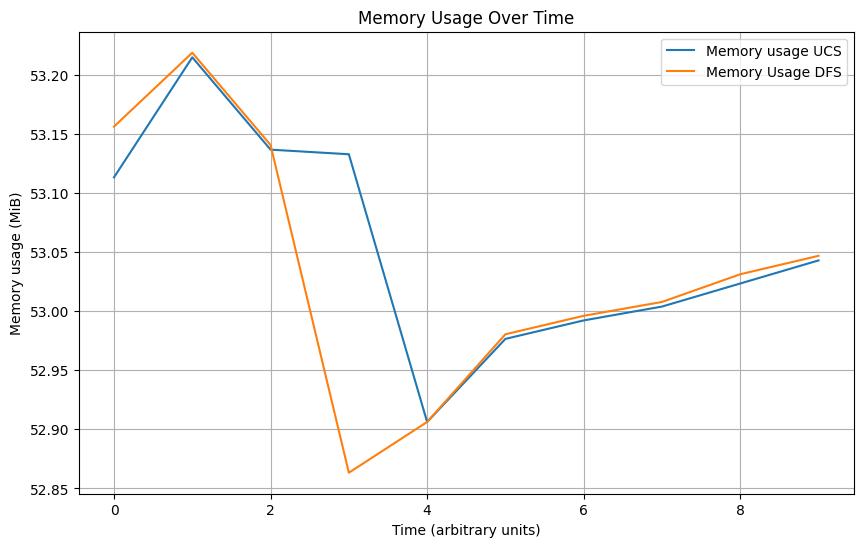

In [28]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def monitor_memory(graph, start, goal):

    ucs_mem_usage = []
    dfs_mem_usage = []
    for _ in range(10):
        
        # Track memory usage at different points
        # Run the function and monitor memory usage
        end_memory_usage_ucs = memory_usage((UCS, (graph, start, goal)), interval=0.1, timeout=1, include_children=True, multiprocess=True, max_usage=False,max_iterations=10,)[0]
        ucs_mem_usage.append(end_memory_usage_ucs)

        end_memory_usage_dfs = memory_usage((DFS, (graph, start, goal)), interval=1, timeout=1, include_children=True, multiprocess=True, max_usage=False, max_iterations=10)[0]
        dfs_mem_usage.append(end_memory_usage_dfs)
        
    return ucs_mem_usage, dfs_mem_usage

def plot_memory_usage(graph, start, goal):
    ucs_mem_usage, dfs_mem_usage = monitor_memory(graph, start, goal)
    plt.figure(figsize=(10, 6))
    plt.plot(ucs_mem_usage, label=f'Memory usage UCS')
    plt.plot(dfs_mem_usage, label = "Memory Usage DFS")
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('Memory usage (MiB)')
    plt.title('Memory Usage Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()




### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : Based on the graph above for space complexity, and the time complexity calculated using code, the following analysis can be done:

1. DFS appears to be more memory-efficient, particularly in the earlier stages, as it consistently uses slightly less memory than UCS. DFS takes less time to execute and search.

2. If memory usage is a critical factor, DFS may be preferable, especially for scenarios where the algorithm is expected to run for shorter periods.

3. Since both algorithms converge to similar memory usage levels over time, the choice between UCS and DFS could depend on other factors like search completeness or specific application requirements. However in terms of time complexity, DFS is better than UCS in most cases.

_________________________________________________________